In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy import linalg as la
import matplotlib.animation as animation
%matplotlib widget

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r'', # insert packages here e.g. r'\usepackage{mathrm}'
    "font.family": "serif",
    "font.serif": "cm",
    "font.size": 10,
    "legend.fontsize": 9
})

figwidth_latex_pt = 246.0
inches_per_pt = 1.0/72.27
golden = (np.sqrt(5)-1.0)/2.0
figwidth = figwidth_latex_pt*inches_per_pt
figheight = figwidth*golden
figsize = (figwidth, figheight)
figsize_map = (figwidth, figwidth)

### weak approximation

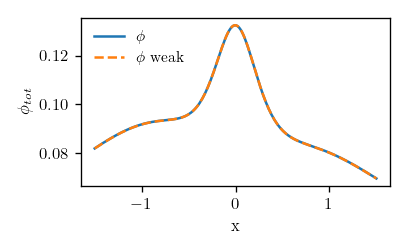

In [89]:
file = np.load("../data/weak_approx_map.npz")
saveplot = "../data/weak_approx_slice.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]
phitot = file["phitot"]
weakphitot = file["weakphitot"]

plt.figure(figsize=figsize, dpi=120)
plt.plot(xx, np.abs(phitot[:, 10]), label="$\phi$")
plt.plot(xx, np.abs(weakphitot[:, 10]), '--', label="$\phi$ weak")
plt.xlabel("x")
plt.ylabel("$\phi_{tot}$")
plt.legend(frameon=False, loc='upper left')
plt.tight_layout()
plt.show()

In [90]:
# list(np.concatenate(deviationavg).flat)

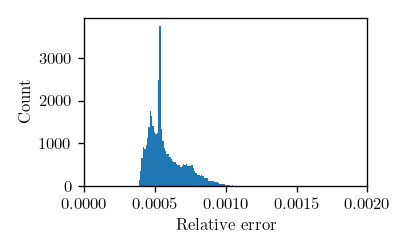

In [91]:
file = np.load("../data/weak_approx_map.npz")
saveplot = "../data/weak_approx_histo.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]

fig, ax = plt.subplots(figsize=figsize, dpi=120)
plt.gcf().set_facecolor("white") # set white background
plt.hist(list(np.concatenate(deviationavg).flat), bins='auto')
plt.xlim((0, 0.002))
plt.xlabel("Relative error")
plt.ylabel("Count")
plt.tight_layout()
# plt.savefig(saveplot)
plt.show()

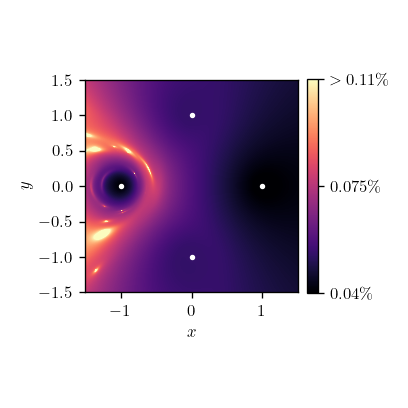

In [128]:
file = np.load("../data/weak_approx_map.npz")
saveplot = "../data/weak_approx_map.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]

fig, ax = plt.subplots(figsize=figsize_map, dpi=120)
plt.gcf().set_facecolor("white") # set white background
for i in range(scattpos.shape[0]):
    ax.scatter(scattpos[i, 0], scattpos[i, 1], c='w', s=5)
im = ax.imshow(deviationavg,
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma",
           vmin=0.0004,
           vmax=0.0011)
ax.ticklabel_format(scilimits=(0,0))
cbar = fig.colorbar(im, fraction=0.046, pad=0.04, ticks=[0.0004, 0.00075, 0.0011])
cbar.set_ticklabels(['$0.04\%$', '0.075\%', '$>0.11\%$'])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout()
plt.savefig(saveplot)
plt.show()

### strong approximation

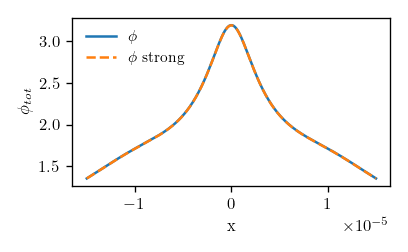

In [85]:
file = np.load("../data/strong_approx_map.npz")
saveplot = "../data/strong_approx_slice.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]
phitot = file["phitot"]
strongphitot = file["strongphitot"]

plt.figure(figsize=figsize, dpi=120)
plt.plot(xx, np.abs(phitot[:, 50]), label="$\phi$")
plt.plot(xx, np.abs(strongphitot[:, 50]), '--', label="$\phi$ strong")
plt.xlabel("x")
plt.ylabel("$\phi_{tot}$")
plt.legend(frameon=False, loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# list(np.concatenate(deviationavg).flat)

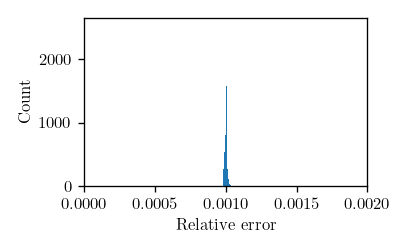

In [87]:
file = np.load("../data/strong_approx_map.npz")
saveplot = "../data/strong_approx_histo.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]

fig, ax = plt.subplots(figsize=figsize, dpi=120)
plt.gcf().set_facecolor("white") # set white background
plt.hist(list(np.concatenate(deviationavg).flat), bins="auto")
plt.xlim(0., 0.002)
plt.xlabel("Relative error")
plt.ylabel("Count")
plt.tight_layout()
# plt.savefig(saveplot)
plt.show()

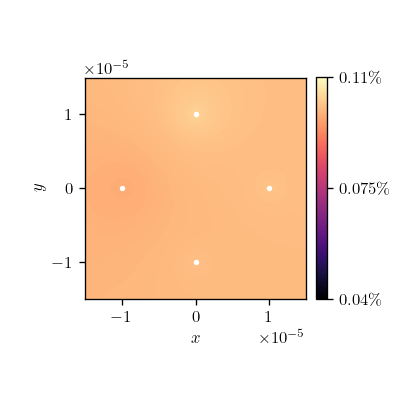

In [129]:
file = np.load("../data/strong_approx_map.npz")
saveplot = "../data/strong_approx_map.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]

fig, ax = plt.subplots(figsize=figsize_map, dpi=120)
plt.gcf().set_facecolor("white") # set white background
for i in range(scattpos.shape[0]):
    ax.scatter(scattpos[i, 0], scattpos[i, 1], c='w', s=5)
im = ax.imshow(deviationavg,
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma",
           vmin=0.0004,
           vmax=0.0011)
ax.ticklabel_format(scilimits=(-5,-5))
cbar = fig.colorbar(im, fraction=0.046, pad=0.04, ticks=[0.0004, 0.00075, 0.0011])
cbar.set_ticklabels(['$0.04\%$', '0.075\%', '0.11\%'])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout()
# plt.savefig(saveplot)
plt.show()

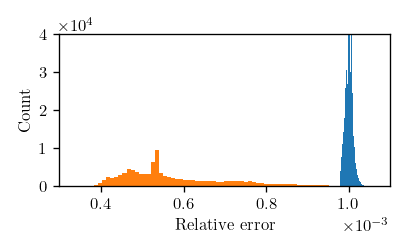

In [152]:
file = np.load("../data/strong_approx_map.npz")
saveplot = "../data/weak_strong_histo.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]
deviationavgweak = np.load("../data/weak_approx_map.npz")["deviationavg"]

fig, ax = plt.subplots(figsize=figsize, dpi=120)
plt.gcf().set_facecolor("white") # set white background
plt.hist(list(np.concatenate(deviationavg).flat), bins="auto", density=True)
plt.hist(list(np.concatenate(deviationavgweak).flat), bins="auto", density=True)
ax.ticklabel_format(scilimits=(0,4))
plt.xlim(0.0003, 0.0011)
plt.ylim(0., 40000)
plt.xlabel("Relative error")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(saveplot)
plt.show()

### alpha inequality

In [3]:
def lhs(alpha):
    return np.imag(alpha)
def rhs(alpha):
    return np.abs(alpha)**2 /4/np.pi

In [ ]:
alpha_span = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=figsize_map, dpi=120)
ax.plot(alpha_span)

In [9]:
np.linspace(0,1,3) + np.linspace(0,1,3)*1j

array([0. +0.j , 0.5+0.5j, 1. +1.j ])